# Import the necessary libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# Load and clean  the dataset

In [23]:
# 1) Load
df = pd.read_csv("/content/drive/MyDrive/student_scores_dataset.csv")  # path to your CSV
print(df.head())


   Hours_Studied  Attendance  Final_Score
0            4.4        59.3         54.5
1            9.6        77.1        100.0
2            7.6        93.6         97.1
3            6.4        86.6         87.7
4            2.4        90.3         59.9


In [24]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Hours_Studied  1000 non-null   float64
 1   Attendance     1000 non-null   float64
 2   Final_Score    1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB
None


In [25]:
# 2) Basic cleaning
# Drop rows with missing critical fields
df = df.dropna(subset=["Hours_Studied", "Attendance", "Final_Score"])

# Coerce to numeric
for col in ["Hours_Studied", "Attendance", "Final_Score"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")
df = df.dropna()


In [26]:
# # 3) Simple sanity checks
# Cap unrealistic values (example rules—tune for your data)
df = df[(df["Hours_Studied"] >= 0) & (df["Hours_Studied"] <= 16*7)]  # <= 16 hrs/day * 7 days
df = df[(df["Attendance"] >= 0) & (df["Attendance"] <= 100)]
df = df[(df["Final_Score"] >= 0) & (df["Final_Score"] <= 100)]

In [12]:
print(df.describe())

       Hours_Studied   Attendance  Final_Score
count    1000.000000  1000.000000  1000.000000
mean        5.413500    75.351200    72.394400
std         2.630701    14.608042    20.803233
min         1.000000    50.200000    21.900000
25%         3.100000    62.075000    55.500000
50%         5.500000    75.950000    72.800000
75%         7.700000    88.000000    92.125000
max        10.000000   100.000000   100.000000


# Visualization of the datasets

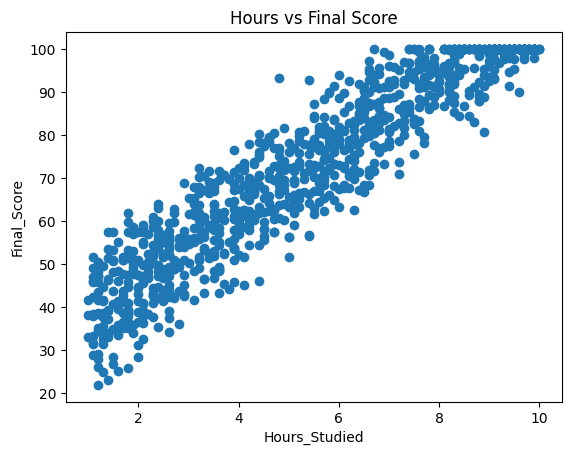

In [27]:
plt.figure()
plt.scatter(df["Hours_Studied"], df["Final_Score"])
plt.xlabel("Hours_Studied");
plt.ylabel("Final_Score");
plt.title("Hours vs Final Score")
plt.show()


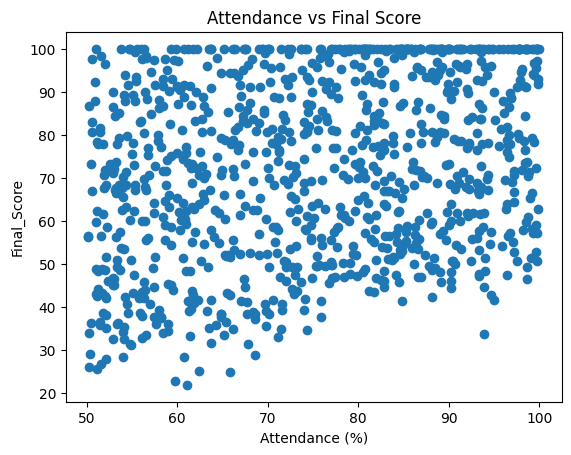

In [28]:
plt.figure()
plt.scatter(df["Attendance"], df["Final_Score"])
plt.xlabel("Attendance (%)");
plt.ylabel("Final_Score");
plt.title("Attendance vs Final Score")
plt.show()


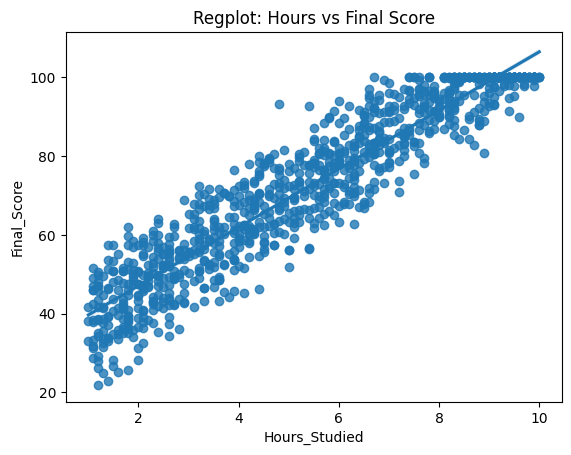

In [29]:
# seaborn regplot gives a quick fitted line (one feature at a time)
sns.regplot(x="Hours_Studied", y="Final_Score", data=df)
plt.title("Regplot: Hours vs Final Score")
plt.show()


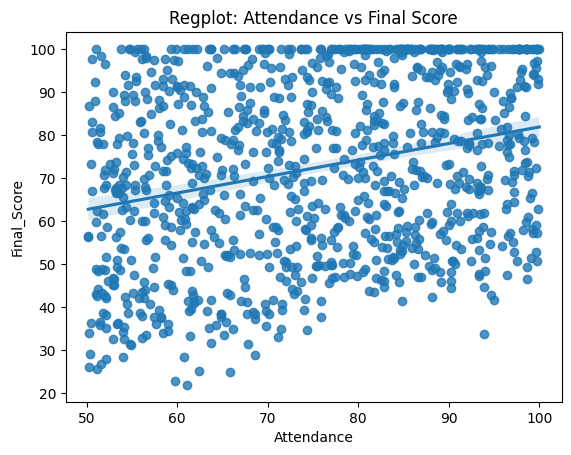

In [30]:
sns.regplot(x="Attendance", y="Final_Score", data=df)
plt.title("Regplot: Attendance vs Final Score")
plt.show()

# Spliting dataset into training and testing data

# Spliting

In [32]:
X = df[["Hours_Studied", "Attendance"]]
y = df["Final_Score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Testing

In [33]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

print("Intercept:", linreg.intercept_)
print("Coefficients (Hours_Studied, Attendance):", linreg.coef_)


Intercept: 6.89456276515655
Coefficients (Hours_Studied, Attendance): [7.35728835 0.33851503]


#  Evaluate dataset

In [34]:
y_pred_test = linreg.predict(X_test)
r2 = r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

print(f"Test R²: {r2:.3f}")
print(f"Test MAE: {mae:.2f} points")


Test R²: 0.939
Test MAE: 4.11 points


# Predict new student score

In [35]:
new_student = np.array([[7, 80]])  # [[Hours_Studied, Attendance]]
predicted_score = linreg.predict(new_student)[0]
print(f"Predicted score for 7 hours & 80% attendance: {predicted_score:.1f}")


Predicted score for 7 hours & 80% attendance: 85.5


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
